In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df=pd.read_csv("FuelConsumption.csv")

In [8]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [9]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


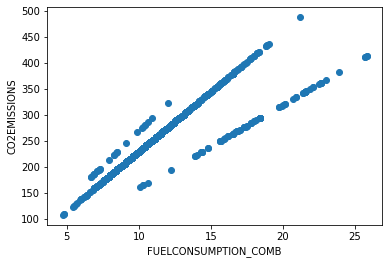

In [13]:
#The amount of CO2 a car emits is directly related to the amount of fuel it consumes.

plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS)
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

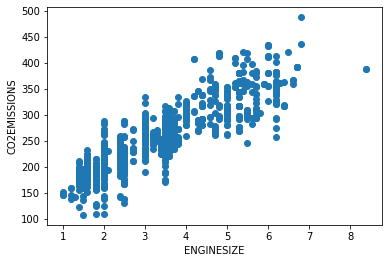

In [25]:
#With a larger engine able to burn more fuel with each revolution it turns in a minute (rpm), it'll usually consume more fuel than a smaller engine would during the same journey.
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

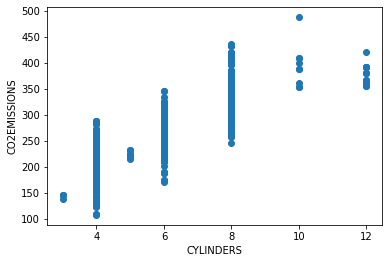

In [27]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

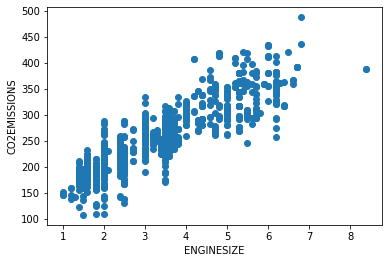

In [14]:
#Bigger engines have more space to burn fuel, which means that these engines consume more fuel than smaller ones
plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

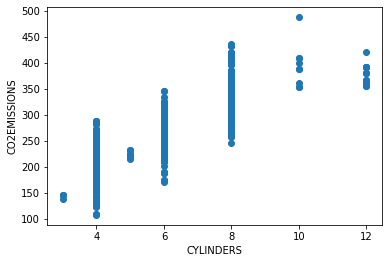

In [16]:
plt.scatter(df.CYLINDERS, df.CO2EMISSIONS)
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

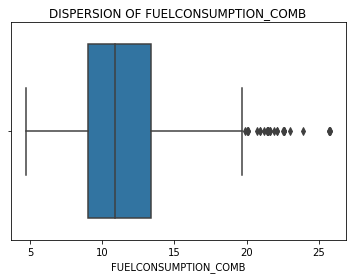

In [21]:
#Lets check do we have ay outliers on selected features

ax=sns.boxplot(df["FUELCONSUMPTION_COMB"])
ax.set_title("DISPERSION OF FUELCONSUMPTION_COMB")
plt.show(ax)

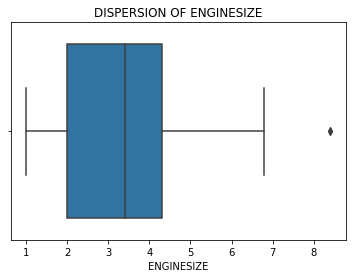

In [22]:
ax=sns.boxplot(df["ENGINESIZE"])
ax.set_title("DISPERSION OF ENGINESIZE")
plt.show(ax)

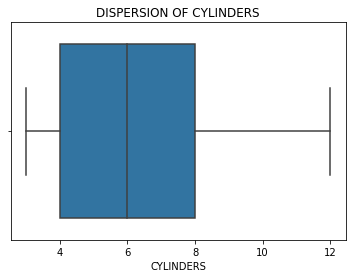

In [23]:
ax=sns.boxplot(df["CYLINDERS"])
ax.set_title("DISPERSION OF CYLINDERS")
plt.show(ax)

In [32]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df[["CO2EMISSIONS"]]

In [33]:
#SPLIT THE DATA IN TO TRAIN AND TEST DATA

from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)

In [40]:
from sklearn.linear_model import LinearRegression

In [45]:
mul_reg = LinearRegression()

mul_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_pred = mul_reg.predict(X_test)

In [49]:
print("Coeffienet:", mul_reg.coef_, "Intercept:", mul_reg.intercept_)

Coeffienet: [[11.51335581  6.80547781  9.79779259]] Intercept: [65.0174538]


In [53]:
from sklearn.metrics import r2_score

scores = r2_score(y_test, y_pred)
print("value of r2 square", scores)

value of r2 square 0.8587361746188313


In [56]:
#predict new value

new_pred = mul_reg.predict([[2, 4, 8.5]])
print("The CO2 Emission is :", new_pred )

The CO2 Emission is : [[198.54731367]]
